<a href="https://colab.research.google.com/github/Frank1497/Road_Symbol_Prediction-/blob/main/Road_symbols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [ ]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [ ]:
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pickle.load(f) 
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)   

# print(type(train_data))  
X_train, y_train = train_data['features'], train_data['labels'] 
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images isnt equal to number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32, 32, 3)), 'The dimensions arent right'
assert(X_val.shape[1:] == (32, 32, 3)), 'The dimensions arent right'
assert(X_test.shape[1:] == (32, 32, 3)), 'The dimensions arent right'

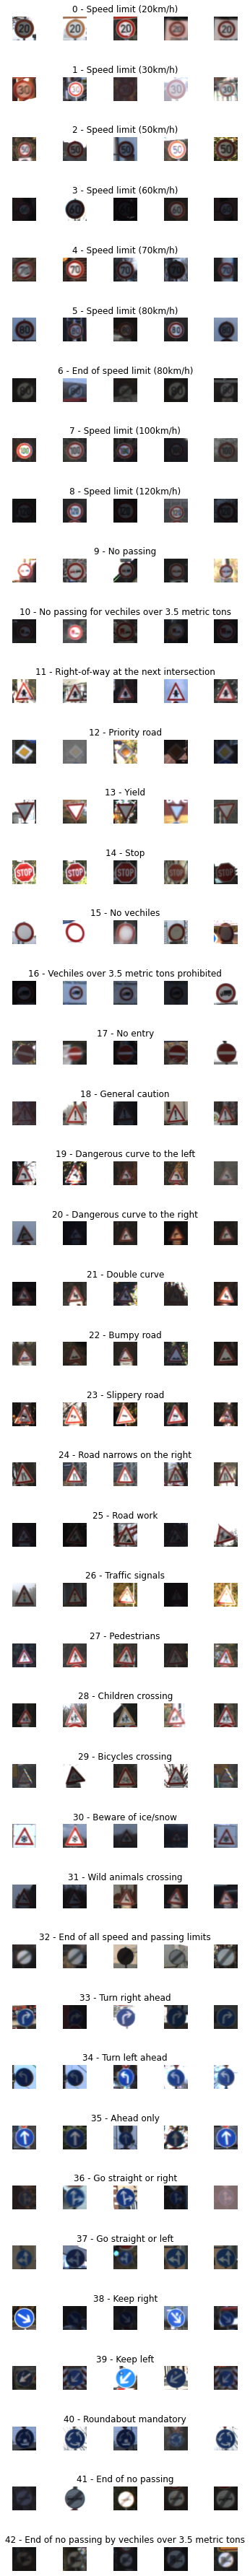

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["SignName"])
            num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

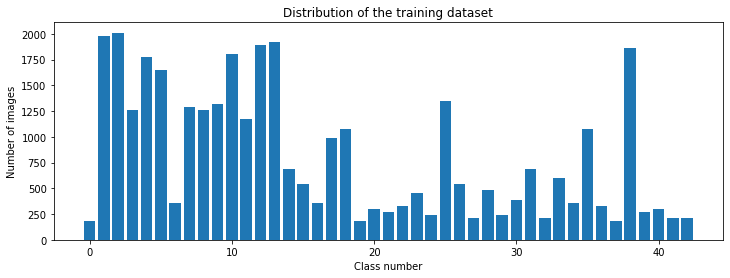

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
# import cv2 as cv
# plt.imshow(X_train[69])
# plt.axis("off")
# print(X_train[69].shape)
# print(y_train[69])

(32, 32)


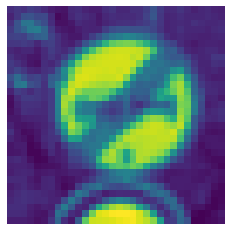

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

def grayscale(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[69])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


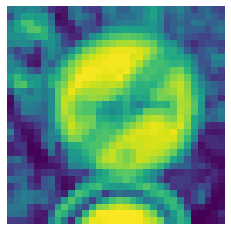

In [ ]:
def equalize(img):
  img = cv.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)  

In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


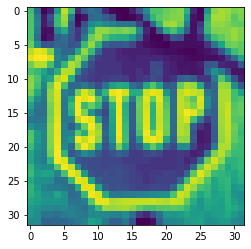

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
DataGen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
DataGen.fit(X_train)

(20, 32, 32, 1)


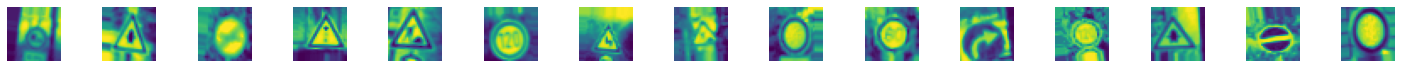

In [ ]:
batches = DataGen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [ ]:
y_train.shape, X_train.shape

((34799,), (34799, 32, 32, 1))

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [ ]:
y_train.shape, X_train.shape

((34799, 43), (34799, 32, 32, 1))

In [ ]:
def CNN():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation="relu"))
  model.add(Conv2D(60, (5, 5), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(30, (3, 3), activation="relu"))
  model.add(Conv2D(30, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
model = CNN()

In [ ]:
history = model.fit_generator(DataGen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=600,
                            epochs=10,
                            validation_data=(X_val, y_val), shuffle = 1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
600/600 [==============================] - 50s 32ms/step - loss: 1.8896 - accuracy: 0.4610 - val_loss: 0.3366 - val_accuracy: 0.8896
Epoch 2/10
600/600 [==============================] - 19s 31ms/step - loss: 0.5912 - accuracy: 0.8172 - val_loss: 0.1460 - val_accuracy: 0.9560
Epoch 3/10
600/600 [==============================] - 19s 31ms/step - loss: 0.3582 - accuracy: 0.8903 - val_loss: 0.1034 - val_accuracy: 0.9683
Epoch 4/10
600/600 [==============================] - 19s 31ms/step - loss: 0.2593 - accuracy: 0.9194 - val_loss: 0.0658 - val_accuracy: 0.9816
Epoch 5/10
600/600 [==============================] - 19s 31ms/step - loss: 0.2216 - accuracy: 0.9315 - val_loss: 0.0538 - val_accuracy: 0.9855
Epoch 6/10
600/600 [==============================] - 19s 31ms/step - loss: 0.1873 - accuracy: 0.9411 - val_loss: 0.0542 - val_accuracy: 0.9832
Epoch 7/10
600/600 [==============================] - 19s 31ms/step - loss: 0.1653 - accuracy: 0.9486 - val_loss: 0.0518 - val_accuracy:

Text(0.5, 0, 'epoch')

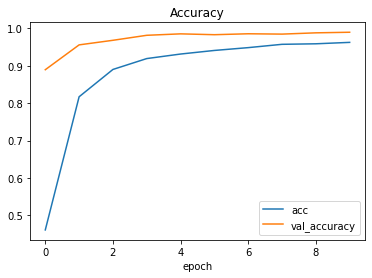

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

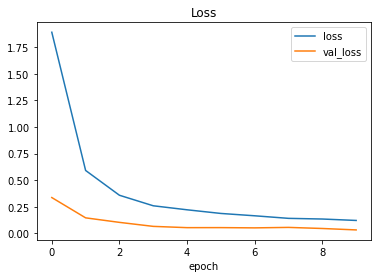

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score', score[0])
print('Test Accuracy', score[1])

Test Score 0.08710827678442001
Test Accuracy 0.9736341834068298


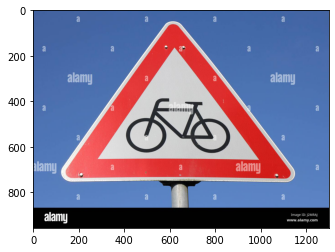

In [ ]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


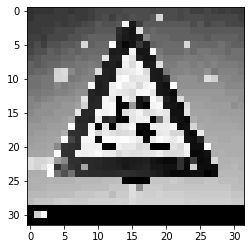

In [ ]:
img = np.asarray(img)
img = cv.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
img = img.reshape(1, 32, 32, 1)
 
#Test image
prediction = model.predict(img)
print("predicted digit:", np.argmax(prediction))

predicted digit: 25
